# DCGAN - Deep Convoluational GANs

__Deep Convolutional Generative Adversarial Network (DCGAN)__ is a type of generative model that was introduced by Radford et al. in their 2015 paper "_Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks_"   

## Theory of DCGAN

#### Architecture:

![DCGAN.png](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-07-01_at_11.27.51_PM_IoGbo1i.png)


**1. Generator:**
- DCGAN's generator network takes a random noise vector as input, often drawn from a simple distribution like a Gaussian distribution.
- It uses transposed convolution layers (sometimes referred to as deconvolution or up-sampling) to upscale the noise vector into an image.
- Batch normalization is commonly applied in each layer to stabilize training.
- The final layer usually uses the Tanh activation function to map the pixel values to the range [-1, 1].

**2. Discriminator:**
- The discriminator network, on the other hand, is a convolutional neural network that processes images.
- It's designed to distinguish between real and generated images.
- Leaky Rectified Linear Units (Leaky ReLU) activations are often used in the discriminator to prevent neurons from becoming completely inactive during training.
- The output of the discriminator is typically a single scalar value, which represents the probability that the input image is a real image.

**Training:**
- DCGANs use a specific loss function for training. The generator aims to minimize the binary cross-entropy loss, encouraging it to produce images that are more similar to real images.
- The discriminator also minimizes binary cross-entropy loss but in the context of distinguishing real from fake images.
- The two networks are trained simultaneously, with the generator trying to generate better fake images and the discriminator trying to become better at distinguishing real from fake images.

#### New Terms:

- **Transposed Convolution:** Transposed convolution is a process of upsampling an input, typically using learnable kernels. It's used in the generator to convert low-resolution noise into high-resolution images.

- **Batch Normalization:** Batch normalization is a technique used to normalize the activations of each layer within a neural network. It helps stabilize training by reducing internal covariate shift.

- **Leaky ReLU:** Leaky Rectified Linear Unit is an activation function used in the discriminator. It allows a small gradient when the unit is not active, which can help training.

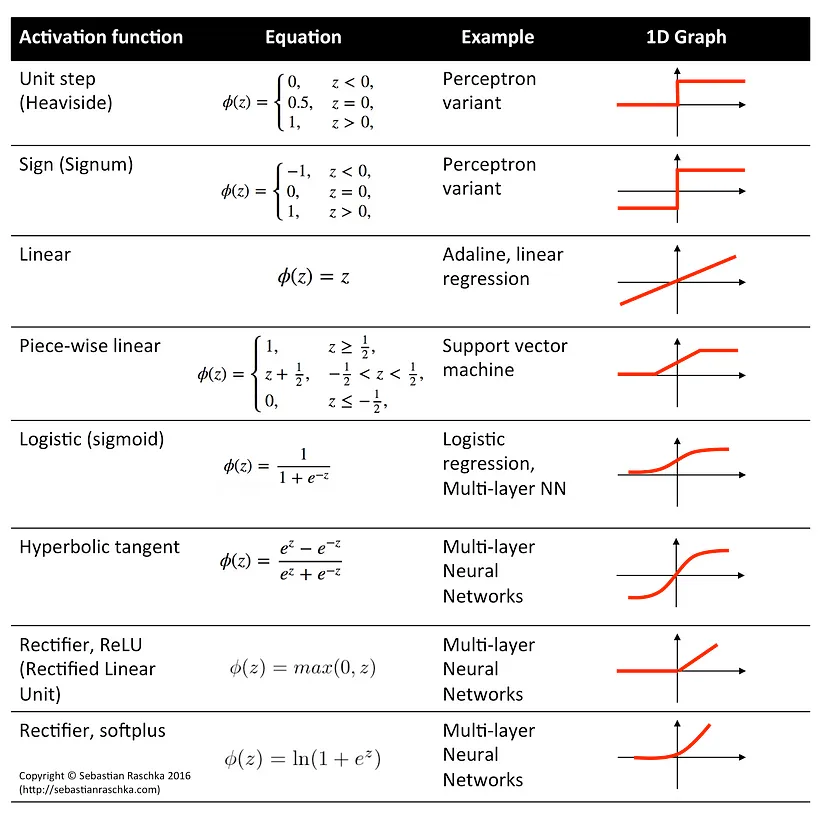


#### Advantages:

1. **High-Quality Image Generation:** DCGANs are known for generating high-quality and realistic images, making them popular in applications like image synthesis and style transfer.

2. **Spatial Hierarchies:** The use of convolutional layers in both the generator and discriminator allows DCGANs to capture spatial hierarchies and patterns in images effectively.

3. **Stability in Training:** DCGAN architecture components like batch normalization and Leaky ReLU activations contribute to more stable training.


#### Disadvantages:

1. **Training Challenges:** Training GANs, including DCGANs, can be challenging. Proper hyperparameter tuning and training strategies are required to prevent issues like mode collapse or vanishing gradients.

2. **Mode Collapse:** DCGANs are susceptible to mode collapse, where they generate limited diversity in the output, focusing on a few modes of the data distribution.

3. **Hyperparameter Sensitivity:** DCGANs are sensitive to hyperparameters such as learning rates and batch sizes, which can affect the quality of generated images.



In summary, DCGANs have had a significant impact on generative modeling, particularly in the context of image generation. They are known for their ability to generate high-quality images and have introduced architectural features and training strategies that are widely used in subsequent GAN variants. However, like other GANs, they come with their own set of training challenges, such as mode collapse and hyperparameter sensitivity, that practitioners need to be aware of when working with them.

## Data Input

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
print(f"Tensorflow Version: {tf.__version__}")

ModuleNotFoundError: No module named 'tensorflow.keras'

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Shape of input
samples, height, width = X_train.shape
print(f"Train Dataset :-\n\tSamples: {samples}\n\tDimension: {height}x{width} px")

In [ ]:
# No of images (classes)
y_train.shape

In [ ]:
# Selecting random image out of 60000 image
i  = np.random.randint(0, 60000)
print(f"At position {i}th we have Number : {y_train[i]}")
plt.imshow(X_train[i],cmap='gray')
plt.axis(False)
plt.show()

In [ ]:
# Reshaping input X train
channel = 1 # Grayscale
X_train = X_train.reshape(samples, height, width, channel).astype('float32')
X_train.shape

In [ ]:
# Getting range of values of pixels for first image
img_number = 0 # First image

X_train[img_number].min(), X_train[img_number].max()

### Standardization

In [ ]:
# Standardization
X_train_standardized = (X_train - np.mean(X_train)) / (np.max(X_train) - np.min(X_train))

# Getting values in range of -1 to 1
X_train = (X_train - 127.5)/127.5
X_train[0].min(), X_train[0].max()

### Mini-Batch Gradient Descent (MGD)

__Gradient descent__ is an optimization algorithm often used for finding the weights or coefficients of machine learning algorithms, such as artificial neural networks and logistic regression.



*3 types of Gradient Descent*
1. **Full-Batch Gradient Descent**: Updates model parameters after computing gradients on the entire training dataset in each iteration, providing an accurate but slow optimization method.

2. **Stochastic Gradient Descent (SGD)**: Updates parameters after computing gradients on a single randomly selected training example, making it fast but noisy.

3. **Mini-Batch Gradient Descent**: Updates parameters after computing gradients on small, randomly selected subsets (mini-batches) of the training dataset, combining efficiency and stability in optimization.

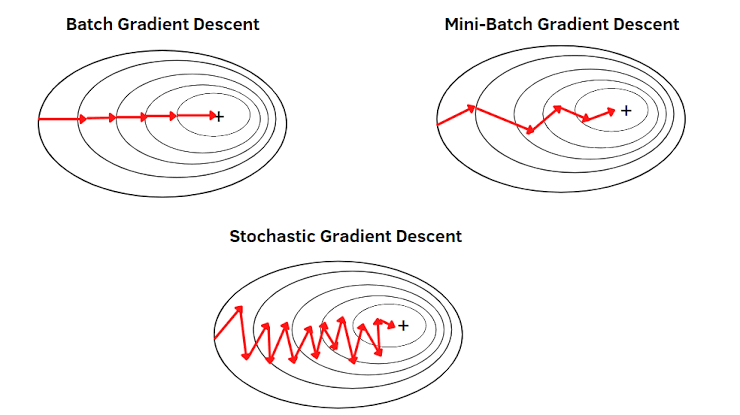

**Pseudocode of GD**
```Python
model = initialization(...)
n_epochs = ...
train_data = ...
for i in n_epochs:
train_data = shuffle(train_data)
X, y = split(train_data)
predictions = predict(X, model)
error = calculate_error(y, predictions)
model = update_model(model, error)
```

It combines the advantages of both full-batch (better convergence) and SGD (faster updates) while avoiding their drawbacks.


In [ ]:
# Buffer Size
BUFFER_SIZE = 60000
BATCH_SIZE = 256

BUFFER_SIZE / BATCH_SIZE # Mini Batch

### Tenors Inputs

* `from_tensor_slices`: Creates a dataset from a list or NumPy array suitable for static in-memory data
* `from_tensor` from a single tensor, suitable for single tensors
* `from_generator` from a Python generator, suitable for dynamic data sources

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(X_train) # Create a dataset from your X_train data
dataset = dataset.shuffle(buffer_size=BUFFER_SIZE) # Shuffle dataset
X_train = dataset.batch(batch_size=BATCH_SIZE) # Batch the dataset into mini-batches for training

In [ ]:
type(X_train)

In [ ]:
X_train

## Generator Block

- [CNN](https://cs231n.github.io/convolutional-networks/)
- [Batch normalization](https://keras.io/api/layers/normalization_layers/batch_normalization/)
- Activation Functions:
    - [Leaky Relu](https://keras.io/api/layers/activation_layers/leaky_relu/)
    - [Activation Functions : Sigmoid, tanh, ReLU, Leaky ReLU, PReLU, ELU, Threshold ReLU and Softmax basics for Neural Networks and Deep Learning](https://medium.com/@himanshuxdactivation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e)
    - [Activation functions in neural networks [Updated 2023]
](https://www.superannotate.com/blog/activation-functions-in-neural-networks)

- [Padding](https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow)
    - [Padding Methods for CNN](https://analyticsindiamag.com/guide-to-different-padding-methods-for-cnn-models/)

In [ ]:
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Reshape, Conv2DTranspose, Conv2D

# 100 to
def build_generator():
    network = tf.keras.Sequential()

    network.add(Dense(units=(7*7*256), use_bias=False, input_shape=(100,)))
    network.add(BatchNormalization())
    network.add(LeakyReLU())

    network.add(Reshape((7,7,256))) # 12544 = 7*7*256
    assert network.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    # 7x7x128
    # Conv2DTranspose is Transposed convolution layer (sometimes called Deconvolution).
    network.add(Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(1, 1), padding='same', use_bias=False))
    assert network.output_shape == (None, 7, 7, 128)
    network.add(BatchNormalization())
    network.add(LeakyReLU())

    # 14x14x64
    network.add(Conv2DTranspose(filters=64, kernel_size=(5,5), strides=(2, 2), padding='same', use_bias=False))
    assert network.output_shape == (None, 14, 14, 64)
    network.add(BatchNormalization())
    network.add(LeakyReLU())

    # 28x28x1
    network.add(Conv2DTranspose(filters=1, kernel_size=(5,5), strides=(2, 2), padding='same', use_bias=True, activation='tanh'))
    assert network.output_shape == (None, 28, 28, 1)

    network.summary()

    return network

In [ ]:
generator = build_generator()

In [ ]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

## Discriminator Block

- [Dropout](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
- [Conv2d x Conv2dTranspose](https://stackoverflow.com/questions/68976745/in-keras-what-is-the-difference-between-conv2dtranspose-and-conv2d)

In [ ]:
def build_discriminator():
    network = tf.keras.Sequential()

    #14x14x64
    network.add(Conv2D(filters=))